# Table of Contents
 <p><div class="lev1 toc-item"><a href="#读取数据" data-toc-modified-id="读取数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>读取数据</a></div><div class="lev1 toc-item"><a href="#数据整理" data-toc-modified-id="数据整理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据整理</a></div><div class="lev2 toc-item"><a href="#将str格式的日期变为-datatime" data-toc-modified-id="将str格式的日期变为-datatime-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>将str格式的日期变为 datatime</a></div><div class="lev2 toc-item"><a href="#筛选月薪格式为“XXXX-XXXX”的信息" data-toc-modified-id="筛选月薪格式为“XXXX-XXXX”的信息-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>筛选月薪格式为“XXXX-XXXX”的信息</a></div><div class="lev2 toc-item"><a href="#分割月薪字段，分别获取月薪的下限值和上限值" data-toc-modified-id="分割月薪字段，分别获取月薪的下限值和上限值-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>分割月薪字段，分别获取月薪的下限值和上限值</a></div><div class="lev1 toc-item"><a href="#对全国范围内的职位进行分析" data-toc-modified-id="对全国范围内的职位进行分析-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>对全国范围内的职位进行分析</a></div><div class="lev2 toc-item"><a href="#主要城市的招聘职位数量分布情况" data-toc-modified-id="主要城市的招聘职位数量分布情况-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>主要城市的招聘职位数量分布情况</a></div><div class="lev1 toc-item"><a href="#北京" data-toc-modified-id="北京-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>北京</a></div><div class="lev1 toc-item"><a href="#长沙" data-toc-modified-id="长沙-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>长沙</a></div>

In [52]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
plt.style.use('ggplot')

In [53]:
# 解决matplotlib显示中文问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 读取数据

In [54]:
client = pymongo.MongoClient('localhost')
db = client['zhilian']
table = db['python']

columns = ['zwmc',
           'gsmc',
           'zwyx',
           'gbsj',
           'gzdd',
           'fkl',
           'brief',
           'zw_link',
           '_id',
           'save_date']

# url_set =  set([records['zw_link'] for records in table.find()])
# print(url_set)

df = pd.DataFrame([records for records in table.find()], columns=columns)

# columns_update = ['职位名称',
#                   '公司名称',
#                   '职位月薪',
#                   '公布时间',
#                   '工作地点',
#                   '反馈率',
#                   '招聘简介',
#                   '网页链接',
#                   '_id',
#                   '信息保存日期']
# df.columns = columns_update
print('总行数为：{}行'.format(df.shape[0]))
df.head(2)

总行数为：23972行


,zwmc,gsmc,zwyx,gbsj,gzdd,fkl,brief,zw_link,_id,save_date
0,PYTHON程序员,义乌市都朋电子商务商行,6000-10000,05-10,杭州-萧山区,71%,岗位职责 1.负责从前端界面到底层服务器的数据平台的整体设计； 2.负责数据中心...,http://jobs.zhaopin.com/428183986250013.htm,59009cdc42949e35dbe920dc,2017-05-20
1,Python开发工程师助理/Python开发学徒/Python程序员实习生可学徒,苏州软世通信息技术有限公司,4001-6000,15天前,苏州-姑苏区,,岗位职责： 1.负责智能搜索； 2.Python相关的数据处理； 3、大专及以上学...,http://jobs.zhaopin.com/466382035250279.htm,59009cdc42949e35dbe920de,2017-05-20


# 数据整理

## 将str格式的日期变为 datatime

In [55]:
df['save_date'] = pd.to_datetime(df['save_date'])
print(df['save_date'].dtype)
# df['save_date']

datetime64[ns]


## 筛选月薪格式为“XXXX-XXXX”的信息

In [57]:
df_clean = df[['zwmc',
           'gsmc',
           'zwyx',
           'gbsj',
           'gzdd',
           'fkl',
           'brief',
           'zw_link',
           'save_date']]

# 对月薪的数据进行筛选，选取格式为“XXXX-XXXX”的信息，方面后续分析
df_clean = df_clean[df_clean['zwyx'].str.contains('\d+-\d+', regex=True)]
print('总行数为：{}行'.format(df_clean.shape[0]))
# df_clean.head()

总行数为：22605行


## 分割月薪字段，分别获取月薪的下限值和上限值

In [58]:
# http://stackoverflow.com/questions/14745022/pandas-dataframe-how-do-i-split-a-column-into-two

# http://stackoverflow.com/questions/20602947/append-column-to-pandas-dataframe

# df_temp.loc[: ,'zwyx_min'],df_temp.loc[: , 'zwyx_max'] = df_temp.loc[: , 'zwyx'].str.split('-',1).str #会有警告
s_min, s_max = df_clean.loc[: , 'zwyx'].str.split('-',1).str
df_min = pd.DataFrame(s_min)
df_min.columns = ['zwyx_min']
df_max = pd.DataFrame(s_max)
df_max.columns = ['zwyx_max']

df_clean_concat = pd.concat([df_clean, df_min, df_max], axis=1)
# df_clean['zwyx_min'].astype(int)
df_clean_concat['zwyx_min'] = pd.to_numeric(df_clean_concat['zwyx_min'])
df_clean_concat['zwyx_max'] = pd.to_numeric(df_clean_concat['zwyx_max'])
# print(df_clean['zwyx_min'].dtype)
print(df_clean_concat.dtypes)
df_clean_concat.head(2)

zwmc                 object
gsmc                 object
zwyx                 object
gbsj                 object
gzdd                 object
fkl                  object
brief                object
zw_link              object
save_date    datetime64[ns]
zwyx_min              int64
zwyx_max              int64
dtype: object


,zwmc,gsmc,zwyx,gbsj,gzdd,fkl,brief,zw_link,save_date,zwyx_min,zwyx_max
0,PYTHON程序员,义乌市都朋电子商务商行,6000-10000,05-10,杭州-萧山区,71%,岗位职责 1.负责从前端界面到底层服务器的数据平台的整体设计； 2.负责数据中心...,http://jobs.zhaopin.com/428183986250013.htm,2017-05-20,6000,10000
1,Python开发工程师助理/Python开发学徒/Python程序员实习生可学徒,苏州软世通信息技术有限公司,4001-6000,15天前,苏州-姑苏区,,岗位职责： 1.负责智能搜索； 2.Python相关的数据处理； 3、大专及以上学...,http://jobs.zhaopin.com/466382035250279.htm,2017-05-20,4001,6000


* 将数据信息按职位月薪进行排序

In [59]:
df_clean_concat.sort_values('zwyx_min',inplace=True)
# df_clean_concat.tail()

* 判断爬取的数据是否有重复值

In [60]:
# 判断爬取的数据是否有重复值
print(df_clean_concat[df_clean_concat.duplicated('zw_link')==True])

Empty DataFrame
Columns: [zwmc, gsmc, zwyx, gbsj, gzdd, fkl, brief, zw_link, save_date, zwyx_min, zwyx_max]
Index: []


* 从上述结果可看出，数据是没有重复的。

# 对全国范围内的职位进行分析

## 主要城市的招聘职位数量分布情况

In [61]:
# from IPython.core.display import display, HTML
ADDRESS = [ '北京', '上海', '广州', '深圳',
           '天津', '武汉', '西安', '成都', '大连',
           '长春', '沈阳', '南京', '济南', '青岛',
           '杭州', '苏州', '无锡', '宁波', '重庆',
           '郑州', '长沙', '福州', '厦门', '哈尔滨',
           '石家庄', '合肥', '惠州', '太原', '昆明',
           '烟台', '佛山', '南昌', '贵阳', '南宁']
df_city = df_clean_concat.copy()

# 由于工作地点的写上，比如北京，包含许多地址为北京-朝阳区等
# 可以用替换的方式进行整理，这里用pandas的replace()方法
for city in ADDRESS:
    df_city['gzdd'] = df_city['gzdd'].replace([(city+'.*')],[city],regex=True)

# 针对全国主要城市进行分析
df_city_main = df_city[df_city['gzdd'].isin(ADDRESS)]

df_city_main_count = df_city_main.groupby('gzdd')['zwmc','gsmc'].count()
df_city_main_count['gsmc'] = df_city_main_count['gsmc']/(df_city_main_count['gsmc'].sum())
df_city_main_count.columns = ['number', 'percentage']

# 按职位数量进行排序
df_city_main_count.sort_values(by='number', ascending=False, inplace=True)

# 添加辅助列，标注城市和百分比，方面在后续绘图时使用
df_city_main_count['label']=df_city_main_count.index+ ' '+  ((df_city_main_count['percentage']*100).round()).astype('int').astype('str')+'%'
print(type(df_city_main_count))

# 职位数量最多的Top10城市的列表
print(df_city_main_count.head(10))

<class 'pandas.core.frame.DataFrame'>
      number  percentage   label
gzdd                            
北京      6936    0.315948  北京 32%
上海      3213    0.146358  上海 15%
深圳      1908    0.086913   深圳 9%
成都      1290    0.058762   成都 6%
杭州      1174    0.053478   杭州 5%
广州      1167    0.053159   广州 5%
南京       826    0.037626   南京 4%
郑州       741    0.033754   郑州 3%
武汉       552    0.025145   武汉 3%
西安       473    0.021546   西安 2%


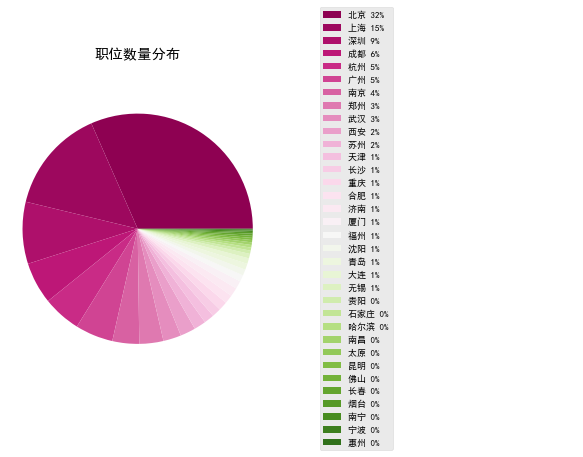

In [62]:
from  matplotlib import cm

label = df_city_main_count['label']
sizes = df_city_main_count['number']

# 设置绘图区域大小
fig, axes = plt.subplots(figsize=(10,6),ncols=2) 
ax1, ax2 = axes.ravel()

colors = cm.PiYG(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks

# 由于城市数量太多，饼图中不显示labels和百分比
patches, texts = ax1.pie(sizes,labels=None, shadow=False, startangle=0, colors=colors)

ax1.axis('equal')  

ax1.set_title('职位数量分布', loc='center')

# ax2 只显示图例（legend）
ax2.axis('off')
ax2.legend(patches, label, loc='center left', fontsize=9)

plt.savefig('job_distribute.jpg')
plt.show()

## 月薪分布情况（全国）

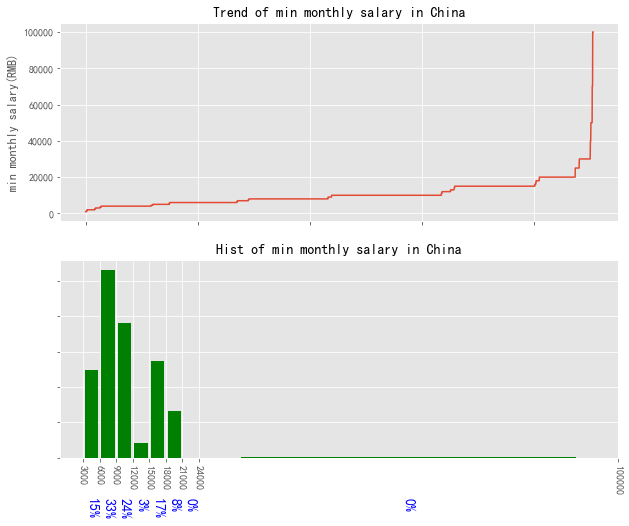

In [63]:
from matplotlib.ticker import FormatStrFormatter

fig, (ax1, ax2) = plt.subplots(figsize=(10,8), nrows=2)

x_pos = list(range(df_clean_concat.shape[0]))
y1 = df_clean_concat['zwyx_min']

ax1.plot(x_pos, y1)
ax1.set_title('Trend of min monthly salary in China', size=14)
ax1.set_xticklabels('')
ax1.set_ylabel('min monthly salary(RMB)')

bins = [3000,6000, 9000, 12000, 15000, 18000, 21000, 24000, 100000]
counts, bins, patches = ax2.hist(y1, bins, normed=1, histtype='bar', facecolor='g', rwidth=0.8)
ax2.set_title('Hist of min monthly salary in China', size=14)
ax2.set_yticklabels('')
# ax2.set_xlabel('min monthly salary(RMB)')

# http://stackoverflow.com/questions/6352740/matplotlib-label-each-bin
ax2.set_xticks(bins) #将bins设置为xticks
ax2.set_xticklabels(bins, rotation=-90) # 设置为xticklabels的方向

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
#     # Label the raw counts
#     ax2.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
#         xytext=(0, -70), textcoords='offset points', va='top', ha='center', rotation=-90)

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax2.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -40), textcoords='offset points', va='top', ha='center', rotation=-90, color='b', size=14)

fig.savefig('salary_quanguo_min.jpg')

**不考虑部分极值后，分析月薪分布情况**

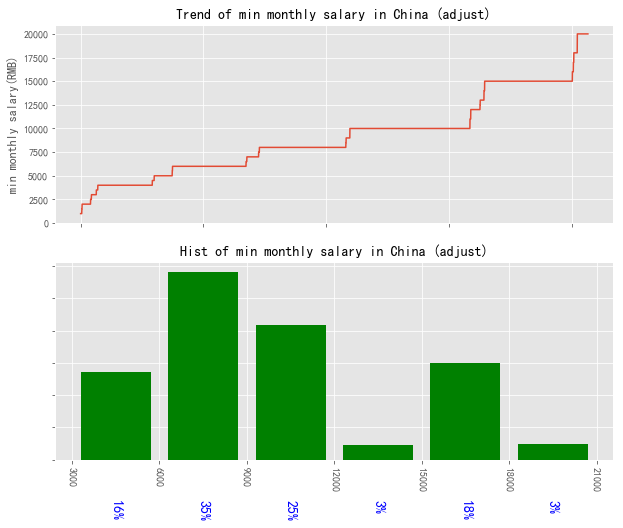

In [64]:
df_zwyx_adjust = df_clean_concat[df_clean_concat['zwyx_min']<=20000]

fig, (ax1, ax2) = plt.subplots(figsize=(10,8), nrows=2)

x_pos = list(range(df_zwyx_adjust.shape[0]))
y1 = df_zwyx_adjust['zwyx_min']

ax1.plot(x_pos, y1)
ax1.set_title('Trend of min monthly salary in China (adjust)', size=14)
ax1.set_xticklabels('')
ax1.set_ylabel('min monthly salary(RMB)')

bins = [3000,6000, 9000, 12000, 15000, 18000, 21000]
counts, bins, patches = ax2.hist(y1, bins, normed=1, histtype='bar', facecolor='g', rwidth=0.8)
ax2.set_title('Hist of min monthly salary in China (adjust)', size=14)
ax2.set_yticklabels('')
# ax2.set_xlabel('min monthly salary(RMB)')

# http://stackoverflow.com/questions/6352740/matplotlib-label-each-bin
ax2.set_xticks(bins) #将bins设置为xticks
ax2.set_xticklabels(bins, rotation=-90) # 设置为xticklabels的方向

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
#     # Label the raw counts
#     ax2.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
#         xytext=(0, -70), textcoords='offset points', va='top', ha='center', rotation=-90)

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax2.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -40), textcoords='offset points', va='top', ha='center', rotation=-90, color='b', size=14)

fig.savefig('salary_quanguo_min_adjust.jpg')


## 相关技能要求


In [65]:
brief_list = list(df_clean_concat['brief'])
brief_str = ''.join(brief_list)
print(type(brief_str))
# print(brief_str)
with open('brief_quanguo.txt', 'w', encoding='utf-8') as f:
    f.write(brief_str)

<class 'str'>


# 北京

## 月薪分布情况

In [66]:
df_beijing = df_clean_concat[df_clean_concat['gzdd'].str.contains('北京.*', regex=True)]
df_beijing.to_excel('zhilian_kw_python_bj.xlsx')
print('总行数为：{}行'.format(df_beijing.shape[0]))
# df_beijing.head()

总行数为：6936行


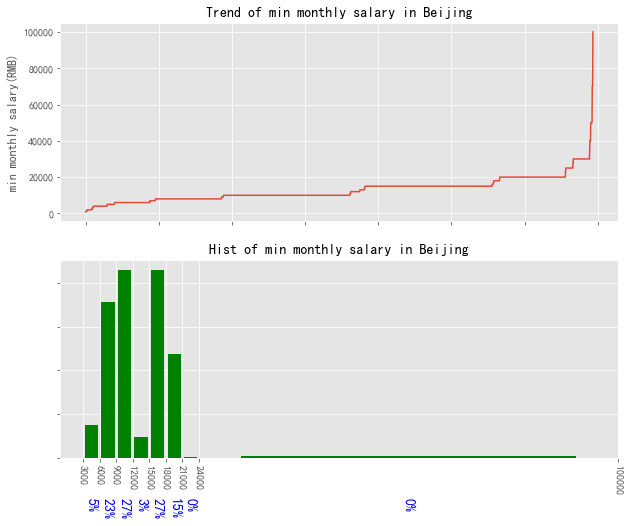

In [67]:
from matplotlib.ticker import FormatStrFormatter

fig, (ax1, ax2) = plt.subplots(figsize=(10,8), nrows=2)

x_pos = list(range(df_beijing.shape[0]))
y1 = df_beijing['zwyx_min']
y2 = df_beijing['zwyx_max']
ax1.plot(x_pos, y1)
ax1.set_title('Trend of min monthly salary in Beijing', size=14)
ax1.set_xticklabels('')
ax1.set_ylabel('min monthly salary(RMB)')

bins = [3000,6000, 9000, 12000, 15000, 18000, 21000, 24000, 100000]
counts, bins, patches = ax2.hist(y1, bins, normed=1, histtype='bar', facecolor='g', rwidth=0.8)
ax2.set_title('Hist of min monthly salary in Beijing', size=14)
ax2.set_yticklabels('')
# ax2.set_xlabel('min monthly salary(RMB)')

# http://stackoverflow.com/questions/6352740/matplotlib-label-each-bin
ax2.set_xticks(bins) #将bins设置为xticks
ax2.set_xticklabels(bins, rotation=-90) # 设置为xticklabels的方向

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
#     # Label the raw counts
#     ax2.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
#         xytext=(0, -70), textcoords='offset points', va='top', ha='center', rotation=-90)

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax2.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -40), textcoords='offset points', va='top', ha='center', rotation=-90, color='blue', size=14)

fig.savefig('salary_beijing_min.jpg')

## 相关技能要求

In [68]:
brief_list_bj = list(df_beijing['brief'])
brief_str_bj = ''.join(brief_list_bj)
print(type(brief_str_bj))
# print(brief_str_bj)
with open('brief_beijing.txt', 'w', encoding='utf-8') as f:
    f.write(brief_str_bj)


<class 'str'>


# 长沙


In [69]:
df_changsha = df_clean_concat[df_clean_concat['gzdd'].str.contains('长沙.*', regex=True)]
# df_changsha = pd.DataFrame(df_changsha, ignore_index=True)
df_changsha.to_excel('zhilian_kw_python_cs.xlsx')
print('总行数为：{}行'.format(df_changsha.shape[0]))
# df_changsha.tail()


总行数为：280行


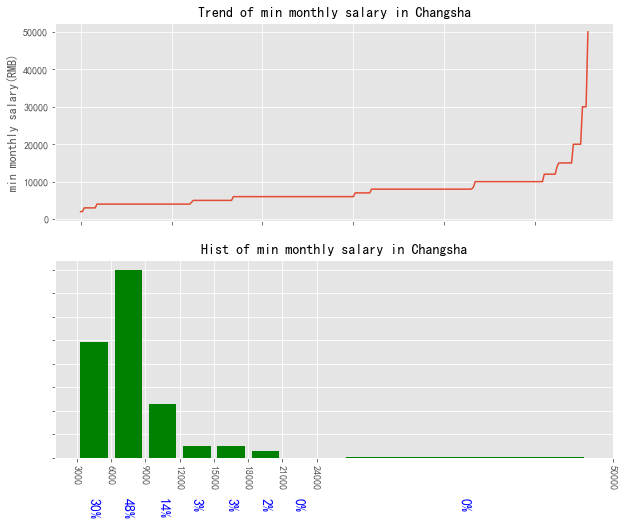

In [70]:
from matplotlib.ticker import FormatStrFormatter

fig, (ax1, ax2) = plt.subplots(figsize=(10,8), nrows=2)

x_pos = list(range(df_changsha.shape[0]))
y1 = df_changsha['zwyx_min']

ax1.plot(x_pos, y1)
ax1.set_title('Trend of min monthly salary in Changsha', size=14)
ax1.set_xticklabels('')
ax1.set_ylabel('min monthly salary(RMB)')

bins = [3000,6000, 9000, 12000, 15000, 18000, 21000, 24000, 50000]
counts, bins, patches = ax2.hist(y1, bins, normed=1, histtype='bar', facecolor='g', rwidth=0.8)
ax2.set_title('Hist of min monthly salary in Changsha', size=14)
ax2.set_yticklabels('')
# ax2.set_xlabel('min monthly salary(RMB)')

# http://stackoverflow.com/questions/6352740/matplotlib-label-each-bin
ax2.set_xticks(bins) #将bins设置为xticks
ax2.set_xticklabels(bins, rotation=-90) # 设置为xticklabels的方向

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
#     # Label the raw counts
#     ax2.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
#         xytext=(0, -70), textcoords='offset points', va='top', ha='center', rotation=-90)

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax2.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -40), textcoords='offset points', va='top', ha='center', rotation=-90, color='blue', size=14)

fig.savefig('salary_changsha_min.jpg')

## 相关技能要求

In [71]:
brief_list_cs = list(df_changsha['brief'])
brief_str_cs = ''.join(brief_list_cs)
print(type(brief_str_cs))
# print(brief_str_cs)
with open('brief_changsha.txt', 'w', encoding='utf-8') as f:
    f.write(brief_str_cs)

<class 'str'>
